### Assignment 1

~ Aminder Kaur

Aim :- To analyze data, develop insights and build a machine learning model to predict the revenue of customers first year life-cycle

#### Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import gender_guesser.detector as gender
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#loading the file 
file ="Apprentice_Chef_Dataset.xlsx"
df = pd.read_excel(io=file)


#### Data Exploration

In [2]:
#displaying the file 
df.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [3]:
#Grtting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

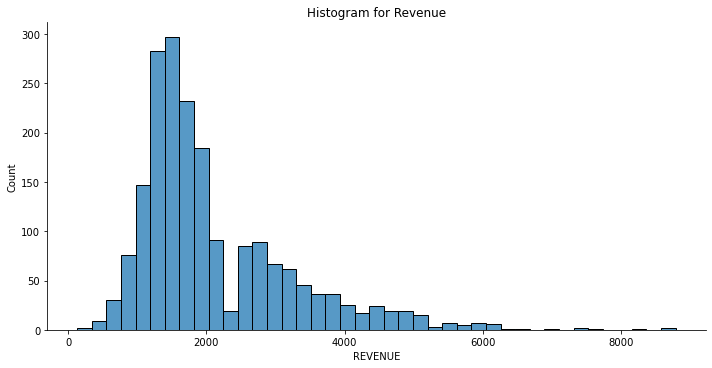

In [4]:
# developing a histogram using DISPLOT
sns.displot(data   = df,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.title("Histogram for Revenue")
plt.show()

So from the diagram it can be seen that our dependent variable is right skewed so we need to make it normalise by transformation 

#### Feature Engineering 

In [5]:
# log transforming Sale_Price and saving it to the dataset
df['log_REVENUE'] = np.log10(df['REVENUE'])

From the above analysis  the only missing values in the whole dataset was in the family name the reason can be that it was unknown or they didnt write so it  can imputed  with unknown values


#### outlier detection

With the help of boxplots detecting the outliers as they may affect the score for the data 

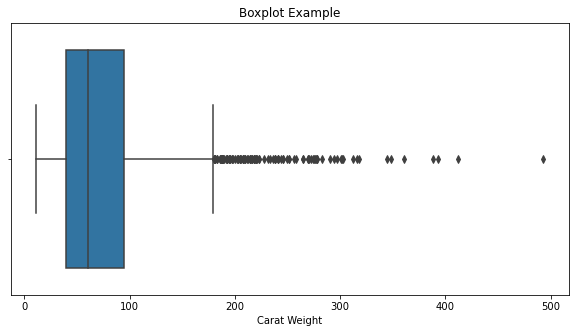

In [6]:
## Session 16.2.2 ##

# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))


# developing a boxplot for carat
sns.boxplot(x      = 'TOTAL_MEALS_ORDERED',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot Example')
plt.xlabel(xlabel = 'Carat Weight')
plt.show()


#### Missing Data

In [7]:
# instantiating an imputation value
fill = "Unknown"


# imputing 'Mas Vnr Area'
df['FAMILY_NAME'] = df['FAMILY_NAME'].fillna(fill)

In [8]:
#checking for any missing values after the imputation
df.isnull().any().any()

False

#### type of variable present in the dataset

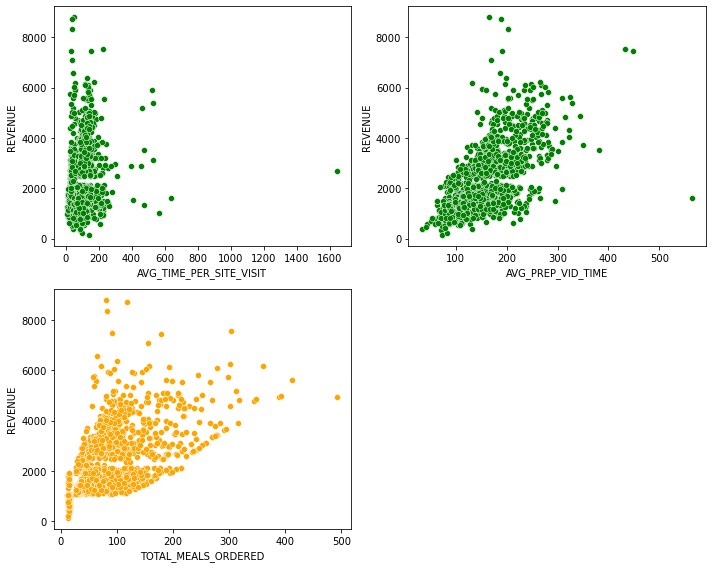

In [9]:
##Getting to now our continuous variables in the data set
#plotting these in order to know which of the variables need to be transformed
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['AVG_TIME_PER_SITE_VISIT'],
                y = df['REVENUE'],
                color = 'g')


# adding labels 
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = df['AVG_PREP_VID_TIME'],
                y = df['REVENUE'],
                color = 'g')


# adding labels 
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = df['TOTAL_MEALS_ORDERED'],
                y = df['REVENUE'],
                color = 'orange')


# adding labels 
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')


########################





# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()

plt.show()


########################



the below part is done in order to know whether there is more than 100 observations on both side if that is the case we need to write a code for outliers

In [10]:
# counting the number of zeroes
AVG_TIME_ZEROES   = len(df['AVG_TIME_PER_SITE_VISIT'][df['AVG_TIME_PER_SITE_VISIT'] == 0])
AVG_VID_ZEROES     = len(df['AVG_PREP_VID_TIME'][df['AVG_PREP_VID_TIME'] == 0])
TOTAL_MEALS_ZEROES = len(df['TOTAL_MEALS_ORDERED'][df['TOTAL_MEALS_ORDERED'] == 0])

## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
AVG_TIME       | {AVG_TIME_ZEROES}\t\t{len(df) - AVG_TIME_ZEROES}
AVG VIDE   | {AVG_VID_ZEROES }\t\t{len(df) - AVG_VID_ZEROES }
TOTAL_MEALS        | {TOTAL_MEALS_ZEROES}\t\t{len(df) - TOTAL_MEALS_ZEROES}

""")


                 No		Yes
               ---------------------
AVG_TIME       | 0		1946
AVG VIDE   | 0		1946
TOTAL_MEALS        | 0		1946




#### Working with interval and count data

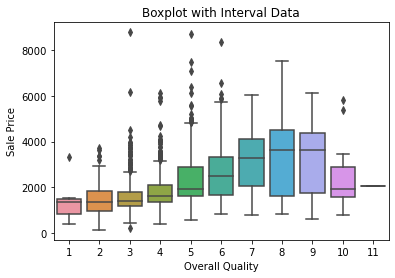

In [11]:
# developing a boxplot
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
            y    = 'REVENUE',
            data = df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

by making boxplots of each interval and count variable transforming those in which a line cannot be in a straight line with its median

In [12]:
df['n_MEDIAN_MEAL_RATING'] = np.log10(df['MEDIAN_MEAL_RATING'])
df['n_LARGEST_ORDER_SIZE'] = np.log10(df['LARGEST_ORDER_SIZE'])
df['n_CONTACTS_W_CUSTOMER_SERVICEl'] = np.log10(df['CONTACTS_W_CUSTOMER_SERVICE'])
df['n_UNIQUE_MEALS_PURCH'] = np.log10(df['UNIQUE_MEALS_PURCH'])

For making these two variables into one 

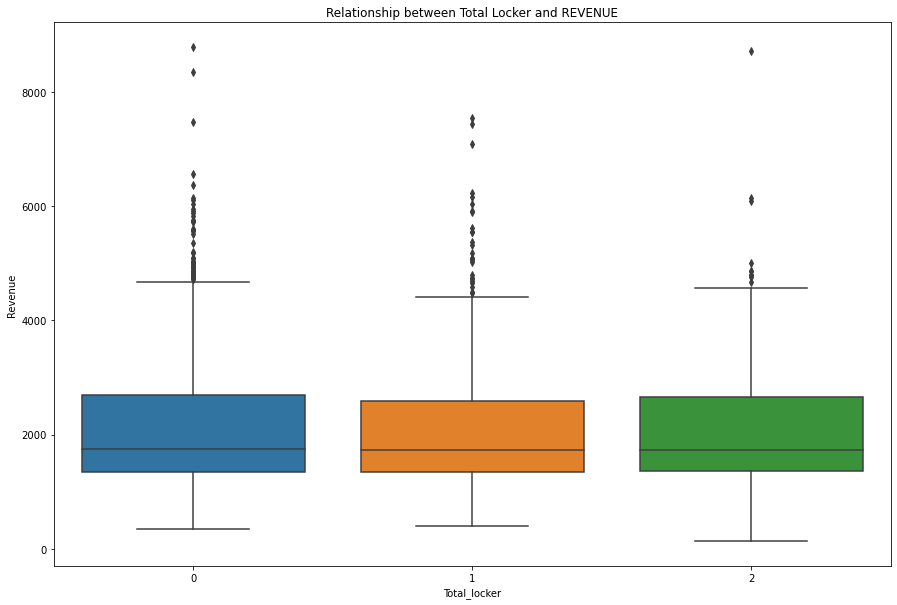


Cancellation

-----------
Total Cancel
-----------
0    1255
1     471
2     220
Name: Total_locker, dtype: int64


---------------------
Cancellation  Correlations
---------------------
PACKAGE_LOCKER        -0.01
REFRIGERATED_LOCKER   -0.00
Total_locker          -0.01
REVENUE                1.00
Name: REVENUE, dtype: float64




In [13]:
# total locker

df['Total_locker'] = df['PACKAGE_LOCKER'] + df['REFRIGERATED_LOCKER']

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'Total_locker',
            y    = 'REVENUE',
            data =df)



# titles and labels
plt.title(label   = 'Relationship between Total Locker and REVENUE')
plt.xlabel(xlabel = 'Total_locker')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.tight_layout
plt.show()


## the following code has been written for you ##

# developing a correlation matrix
cancel_corr = df.loc[ : , ['PACKAGE_LOCKER',
                              'REFRIGERATED_LOCKER',
                              'Total_locker',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
Cancellation
=========

-----------
Total Cancel
-----------
{df['Total_locker'].value_counts(normalize = False).sort_index()}


---------------------
Cancellation  Correlations
---------------------
{cancel_corr['REVENUE']}

""")

#### Feature engineering of object variable

In [14]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [15]:
# renaming column to concatenate
email_df.columns = ['0', 'email_domain']


# concatenating personal_email_domain with df
df = pd.concat([df, email_df['email_domain']],
                   axis = 1)


# printing value counts of email_domain
#df.loc[: ,'email_domain'].value_counts()

In [16]:
# email domain types as given in the case study 
personal_email = ['@gmail.com', '@yahoo.com','@protonmail.com']
junk_email  = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']
prof_email =['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com','@cisco.com',
              '@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org','@goldmansacs.com','@homedepot.com',
              '@ibm.com','@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com',
              '@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com',
              '@verizon.com','@visa.com','@walmart.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in df['email_domain']:
    
    if '@' + domain in personal_email:
        placeholder_lst.append('personal')
        

    elif '@' + domain in junk_email:
        placeholder_lst.append('junk')
        
    elif '@' + domain in prof_email:
        placeholder_lst.append('professional')


    else:
            print('Unknown')


# concatenating with original DataFrame
df['domain_group'] = pd.Series(placeholder_lst)


# checking results
df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

As for finding the gender it is of no use to our data so gender guesser has not been used 

#### one hot encoding

Email may have a significant effect on the revenue generated so hot encoding it so as to be used in the model development

In [17]:
#doing one hot encoding on the domain group 
hot_email_domain      = pd.get_dummies(df['domain_group'])
df = df.drop('domain_group', axis = 1)
df = pd.concat([df,hot_email_domain],axis=1)

### Models

In [18]:
# preparing explanatory variable data
x_data   = df.drop(['REVENUE',
                    'log_REVENUE','FIRST_NAME','FAMILY_NAME','NAME','EMAIL','email_domain'],
                               axis = 1)


# preparing response variables
df_target = df.loc[ : ,'REVENUE']
log_target = df.loc[ : ,'log_REVENUE']


# preparing training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            df_target,
            test_size = 0.25,
            random_state = 219)


In [19]:
# preparing training and testing sets 
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(
            x_data,
            log_target,
            test_size = 0.25,
            random_state = 219)

#### correlation 

To see the corelation between differnt variable 

In [20]:
# creating a (Pearson) correlation matrix
df_corr = df.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                           1.00
log_REVENUE                       0.95
AVG_PREP_VID_TIME                 0.64
MEDIAN_MEAL_RATING                0.61
TOTAL_MEALS_ORDERED               0.60
n_MEDIAN_MEAL_RATING              0.55
TOTAL_PHOTOS_VIEWED               0.47
MASTER_CLASSES_ATTENDED           0.45
LARGEST_ORDER_SIZE                0.44
n_LARGEST_ORDER_SIZE              0.42
n_CONTACTS_W_CUSTOMER_SERVICEl    0.17
AVG_TIME_PER_SITE_VISIT           0.14
CONTACTS_W_CUSTOMER_SERVICE       0.10
PRODUCT_CATEGORIES_VIEWED         0.03
MOBILE_NUMBER                     0.03
PC_LOGINS                         0.02
WEEKLY_PLAN                       0.01
CANCELLATIONS_BEFORE_NOON         0.01
TASTES_AND_PREFERENCES            0.01
professional                      0.01
personal                          0.01
EARLY_DELIVERIES                 -0.00
REFRIGERATED_LOCKER              -0.00
CROSS_SELL_SUCCESS                0.00
LATE_DELIVERIES                  -0.01
Total_locker             

####  ols (Ordinary Least Squares)

In [21]:
# merging X_train and y_train so that they can be used in statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)
lm_best2 = smf.ols(formula =  """REVENUE ~ TOTAL_PHOTOS_VIEWED +
                                        AVG_PREP_VID_TIME +
                                        TOTAL_MEALS_ORDERED +
                                        CROSS_SELL_SUCCESS +
                                        UNIQUE_MEALS_PURCH +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING + n_MEDIAN_MEAL_RATING +
                                        n_LARGEST_ORDER_SIZE +
                                        n_CONTACTS_W_CUSTOMER_SERVICEl +
                                        n_UNIQUE_MEALS_PURCH
                                        
                                         
                                         """,
                                        data = df_train)


# Step 2: FIT the data into the model object
results2 = lm_best2.fit()


# Step 3: analyze the SUMMARY output
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:27:42   Log-Likelihood:                -11449.
No. Observations:                1459   AIC:                         2.293e+04
Df Residuals:                    1445   BIC:                         2.300e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### OLS Transformed Revenue

Now performing the OLS using the transformed Revenue

In [22]:
# merging X_train and y_train so that they can be used in statsmodels
df_train = pd.concat([x_train_l, y_train_l], axis = 1)
lm_best21 = smf.ols(formula =  """log_REVENUE ~ TOTAL_PHOTOS_VIEWED +
                                        AVG_PREP_VID_TIME +
                                        TOTAL_MEALS_ORDERED +
                                        CROSS_SELL_SUCCESS +
                                        UNIQUE_MEALS_PURCH +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING + n_MEDIAN_MEAL_RATING +
                                        n_LARGEST_ORDER_SIZE +
                                        n_CONTACTS_W_CUSTOMER_SERVICEl +
                                        n_UNIQUE_MEALS_PURCH
                                        
                                         
                                         """,
                                        data = df_train)


# Step 2: FIT the data into the model object
results21 = lm_best21.fit()


# Step 3: analyze the SUMMARY output
print(results21.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     303.2
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:27:42   Log-Likelihood:                 1171.5
No. Observations:                1459   AIC:                            -2315.
Df Residuals:                    1445   BIC:                            -2241.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

From the  above model it can be seen that overall the model is statistically significant and all the variables choosen are statistically significant as its pvalue is less than 0.05.It can also be judged that the n_median_meal_ratng has highest significance on the Revenue

#### Linear Regression

In [23]:
import sklearn.linear_model

Building data for the ols

In [24]:
#### 
# applying modelin scikit-learn
# choosing the variables that have to be choosen for the model development 
var =['CROSS_SELL_SUCCESS',  'TOTAL_MEALS_ORDERED', 
              'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
              'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
              'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS',
              'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
              'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 
              'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 
              'Total_locker', 'junk', 'personal', 'professional','n_MEDIAN_MEAL_RATING', 'n_LARGEST_ORDER_SIZE', 
              'n_CONTACTS_W_CUSTOMER_SERVICEl', 'n_UNIQUE_MEALS_PURCH']
# preparing x-variables from the OLS model
ols_data = df[var]


# preparing response variable
chef_target = df['REVENUE']

#datasplit for linear regression
# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [25]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.698
OLS Testing Score  : 0.7007
OLS Train-Test Gap : 0.0027


##### Coefficients

In [26]:
lr_model_values = zip(x_data[var].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', -747.37)
('CROSS_SELL_SUCCESS', -93.77)
('TOTAL_MEALS_ORDERED', 5.22)
('UNIQUE_MEALS_PURCH', 236.19)
('CONTACTS_W_CUSTOMER_SERVICE', -74.65)
('PRODUCT_CATEGORIES_VIEWED', 8.02)
('AVG_TIME_PER_SITE_VISIT', -0.04)
('MOBILE_NUMBER', 12.06)
('CANCELLATIONS_BEFORE_NOON', 4.33)
('CANCELLATIONS_AFTER_NOON', 4.28)
('TASTES_AND_PREFERENCES', 21.92)
('PC_LOGINS', -16.87)
('MOBILE_LOGINS', -53.01)
('WEEKLY_PLAN', 0.59)
('EARLY_DELIVERIES', -4.21)
('LATE_DELIVERIES', 6.18)
('PACKAGE_LOCKER', -1.31)
('REFRIGERATED_LOCKER', -18.58)
('AVG_PREP_VID_TIME', 8.72)
('LARGEST_ORDER_SIZE', -175.29)
('MASTER_CLASSES_ATTENDED', 179.62)
('MEDIAN_MEAL_RATING', 997.61)
('AVG_CLICKS_PER_VISIT', -0.41)
('TOTAL_PHOTOS_VIEWED', 0.68)
('Total_locker', -19.9)
('junk', -37.01)
('personal', 6.82)
('professional', 30.19)
('n_MEDIAN_MEAL_RATING', -3510.09)
('n_LARGEST_ORDER_SIZE', 829.03)
('n_CONTACTS_W_CUSTOMER_SERVICEl', 1604.84)
('n_UNIQUE_MEALS_PURCH', -3009.57)


#### Lasso Model 

regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical mod

In [27]:
from sklearn.linear_model import LinearRegression

#x_data = x_data.apply(pd.to_numeric, errors='coerce')
#df_target = df_target.apply(pd.to_numeric, errors='coerce')

In [38]:
import sklearn.linear_model
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 0.07,
                                         normalize = False) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.6979
Lasso Testing Score  : 0.7007
Lasso Train-Test Gap : 0.0027


So the test train gap is below 0.05 so this is a good model 

##### Coefficients

In [29]:
# zipping each feature name to its coefficient
lasso_model_values = zip(x_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 15.49)
('CROSS_SELL_SUCCESS', -81.73)
('TOTAL_MEALS_ORDERED', 5.47)
('UNIQUE_MEALS_PURCH', 221.21)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('PRODUCT_CATEGORIES_VIEWED', 9.05)
('AVG_TIME_PER_SITE_VISIT', -0.08)
('MOBILE_NUMBER', 6.26)
('CANCELLATIONS_BEFORE_NOON', 2.03)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 24.06)
('PC_LOGINS', -9.68)
('MOBILE_LOGINS', -47.55)
('WEEKLY_PLAN', 0.36)
('EARLY_DELIVERIES', -2.84)
('LATE_DELIVERIES', 5.74)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -15.58)
('AVG_PREP_VID_TIME', 8.7)
('LARGEST_ORDER_SIZE', -107.25)
('MASTER_CLASSES_ATTENDED', 176.62)
('MEDIAN_MEAL_RATING', 672.24)
('AVG_CLICKS_PER_VISIT', -12.25)
('TOTAL_PHOTOS_VIEWED', 0.68)
('n_MEDIAN_MEAL_RATING', -1833.71)
('n_LARGEST_ORDER_SIZE', 212.6)
('n_CONTACTS_W_CUSTOMER_SERVICEl', 479.01)
('n_UNIQUE_MEALS_PURCH', -2858.92)
('Total_locker', -24.91)
('junk', -36.88)
('personal', -0.0)
('professional', 14.83)


#### ARD -(Automatic Relevance Determination (ARD) model ) - Best Model

In [30]:
from sklearn.linear_model import ARDRegression
# INSTANTIATING a model object
ard_model = ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train,y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train,y_train).round(4))
print('Testing Score :',  ard_model.score(x_test,y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train,y_train).round(4)
ard_test_score  = ard_model.score(x_test,y_test).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6964
Testing Score : 0.7039
ARD Train-Test Gap : 0.0075


##### Coefficients

In [31]:
# zipping each feature name to its coefficient
ard_model_values = zip(x_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -656.57)
('CROSS_SELL_SUCCESS', -58.28034)
('TOTAL_MEALS_ORDERED', 5.3018)
('UNIQUE_MEALS_PURCH', 234.60434)
('CONTACTS_W_CUSTOMER_SERVICE', -51.44667)
('PRODUCT_CATEGORIES_VIEWED', 5.24746)
('AVG_TIME_PER_SITE_VISIT', -0.00013)
('MOBILE_NUMBER', 0.00012)
('CANCELLATIONS_BEFORE_NOON', 0.00028)
('CANCELLATIONS_AFTER_NOON', 0.0001)
('TASTES_AND_PREFERENCES', 0.00138)
('PC_LOGINS', -0.00129)
('MOBILE_LOGINS', -31.72953)
('WEEKLY_PLAN', 0.00075)
('EARLY_DELIVERIES', -0.00102)
('LATE_DELIVERIES', 0.19195)
('PACKAGE_LOCKER', -0.00123)
('REFRIGERATED_LOCKER', -0.00538)
('AVG_PREP_VID_TIME', 8.63356)
('LARGEST_ORDER_SIZE', -136.64316)
('MASTER_CLASSES_ATTENDED', 175.65326)
('MEDIAN_MEAL_RATING', 954.767)
('AVG_CLICKS_PER_VISIT', -0.00019)
('TOTAL_PHOTOS_VIEWED', 0.65244)
('n_MEDIAN_MEAL_RATING', -3236.53923)
('n_LARGEST_ORDER_SIZE', 491.9728)
('n_CONTACTS_W_CUSTOMER_SERVICEl', 1244.95315)
('n_UNIQUE_MEALS_PURCH', -2991.30541)
('Total_locker', -13.05684)
('junk', -6.02445)
('perso

In [32]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -656.57)
('CROSS_SELL_SUCCESS', -58.28034)
('TOTAL_MEALS_ORDERED', 5.3018)
('UNIQUE_MEALS_PURCH', 234.60434)
('CONTACTS_W_CUSTOMER_SERVICE', -51.44667)
('PRODUCT_CATEGORIES_VIEWED', 5.24746)
('AVG_TIME_PER_SITE_VISIT', -0.00013)
('MOBILE_NUMBER', 0.00012)
('CANCELLATIONS_BEFORE_NOON', 0.00028)
('CANCELLATIONS_AFTER_NOON', 0.0001)
('TASTES_AND_PREFERENCES', 0.00138)
('PC_LOGINS', -0.00129)
('MOBILE_LOGINS', -31.72953)
('WEEKLY_PLAN', 0.00075)
('EARLY_DELIVERIES', -0.00102)
('LATE_DELIVERIES', 0.19195)
('PACKAGE_LOCKER', -0.00123)
('REFRIGERATED_LOCKER', -0.00538)
('AVG_PREP_VID_TIME', 8.63356)
('LARGEST_ORDER_SIZE', -136.64316)
('MASTER_CLASSES_ATTENDED', 175.65326)
('MEDIAN_MEAL_RATING', 954.767)
('AVG_CLICKS_PER_VISIT', -0.00019)
('TOTAL_PHOTOS_VIEWED', 0.65244)
('n_MEDIAN_MEAL_RATING', -3236.53923)
('n_LARGEST_ORDER_SIZE', 491.9728)
('n_CONTACTS_W_CUSTOMER_SERVICEl', 1244.95315)
('n_UNIQUE_MEALS_PURCH', -2991.30541)
('Total_locker', -13.05684)
('junk', -6.02445)
('perso

In [33]:
# comparing results

print(f"""
Model      Train Score      Test Score                   Train_Test_Gap
-----      -----------      ----------                   --------------
OLS        {lr_train_score}            {lr_test_score}               {lr_test_gap}
Lasso      {lasso_train_score}           {lasso_test_score}            {lasso_test_gap}
ARD        {ard_train_score}           {ard_test_score}              {ard_test_gap}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model      Train Score      Test Score                   Train_Test_Gap
-----      -----------      ----------                   --------------
OLS        0.698            0.7007               0.0027
Lasso      0.6947           0.699            0.0027
ARD        0.6964           0.7039              0.0075




So the best model is the ARD